In [2]:
#Packages
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

#Data preprocessing
(x_train, _), (x_test, _) = mnist.load_data()
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [6]:
#Define autoencoders
input_img=Input(shape=(784,))
encoded=Dense(128,activation='relu')(input_img)

decoded=Dense(784,activation='relu')(encoded)

#Build autoencoder model
autoencoder=Model(input_img,decoded)

#Compile
autoencoder.compile(optimizer=Adam(),loss='binary_crossentropy')

#Train
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 6s 21ms/step - loss: 0.2740 - val_loss: 0.1910
Epoch 2/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1844 - val_loss: 0.1868
Epoch 3/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1743 - val_loss: 0.1687
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1643 - val_loss: 0.1722
Epoch 5/50
235/235 [==============================] - 4s 19ms/step - loss: 0.2002 - val_loss: 0.2381
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1898 - val_loss: 0.1833
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1872 - val_loss: 0.2410
Epoch 8/50
235/235 [==============================] - 5s 19ms/step - loss: 0.2038 - val_loss: 0.1890
Epoch 9/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1953 - val_loss: 0.2003
Epoch 10/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1823 - val_lo

313/313 [==============================] - 1s 2ms/step


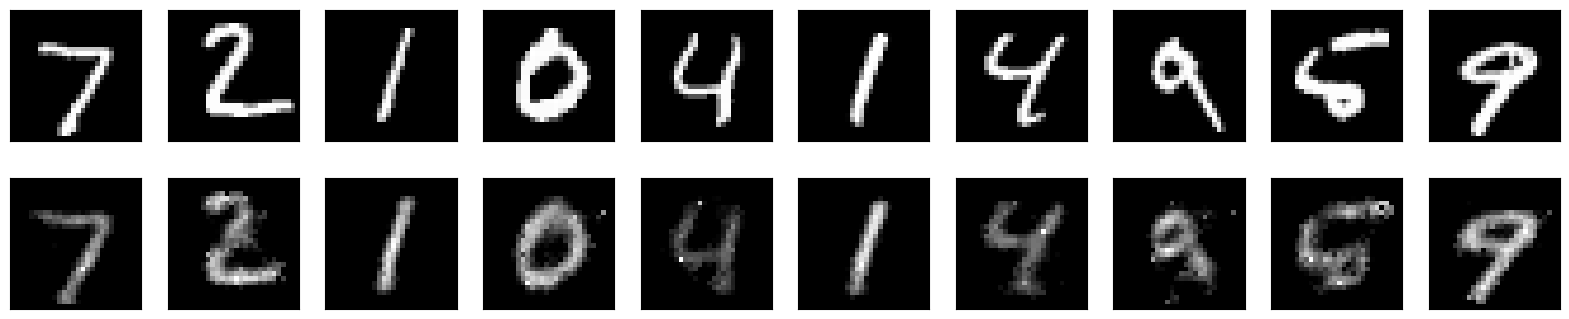

In [8]:
#Visualization for Autoencoder
import matplotlib.pyplot as plt

#encode and decode some digits
encoded_imgs=autoencoder.predict(x_test)

#plot the og and reconstructed images
n=10 #no of digits to display
plt.figure(figsize=(20,4))
for i in range(n):
    #display original
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #display reconstruction
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(encoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Sparse Autoencoder**

Epoch 1/50
469/469 [==============================] - 7s 11ms/step - loss: 0.2586 - val_loss: 0.2207
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.2090 - val_loss: 0.1998
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1965 - val_loss: 0.1930
Epoch 4/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1903 - val_loss: 0.1878
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1863 - val_loss: 0.1846
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1829 - val_loss: 0.1815
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1804 - val_loss: 0.1800
Epoch 8/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1782 - val_loss: 0.1784
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1764 - val_loss: 0.1761
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1748 - val_loss: 0.1

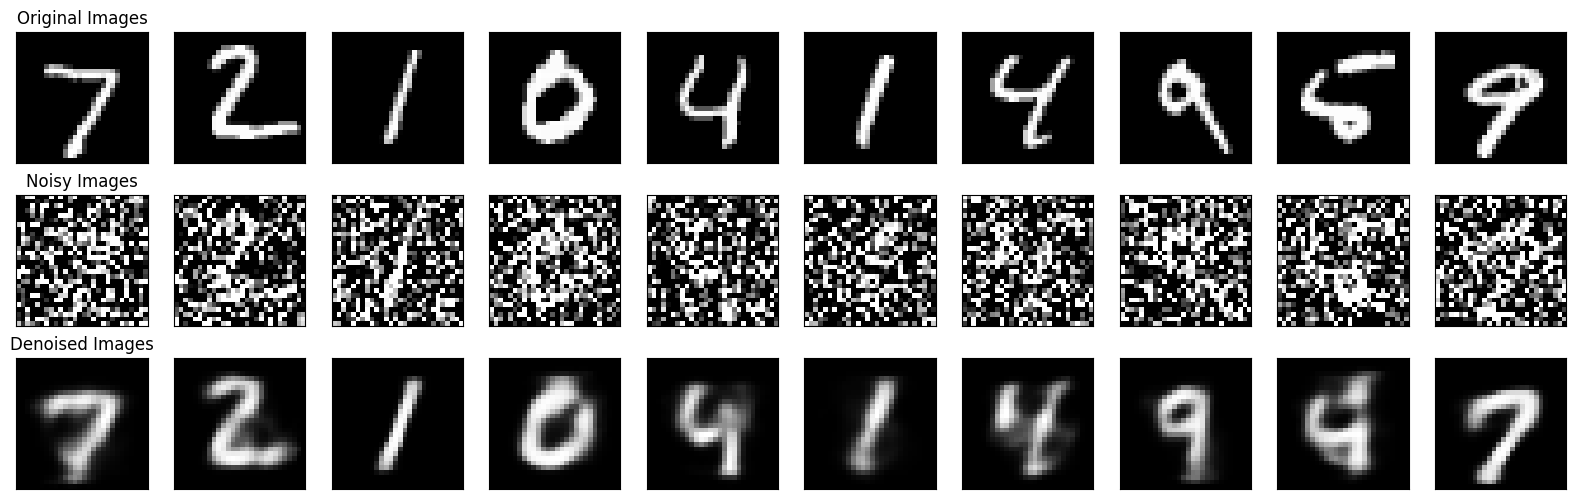

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Assuming x_train and x_test are already loaded and normalized

# Flatten the images
input_dim = 28 * 28
encoding_dim = 64  # Dimension of the encoding layer

# Define the autoencoder architecture
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Flatten the data
x_train_flattened = x_train_noisy.reshape((x_train_noisy.shape[0], input_dim))
x_test_flattened = x_test_noisy.reshape((x_test_noisy.shape[0], input_dim))
x_train_original_flattened = x_train.reshape((x_train.shape[0], input_dim))

# Train the autoencoder
autoencoder.fit(x_train_flattened, x_train_original_flattened,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_flattened, x_test.reshape((x_test.shape[0], input_dim))))

# Denoise the test images
reconstructed = autoencoder.predict(x_test_flattened)

# Reshape the data back to the original image dimensions
x_test_noisy_images = x_test_noisy.reshape((x_test_noisy.shape[0], 28, 28))
x_test_images = x_test.reshape((x_test.shape[0], 28, 28))
reconstructed_images = reconstructed.reshape((reconstructed.shape[0], 28, 28))

# Plot the first 10 images from the test set, noisy images, and denoised images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Original Images')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Noisy Images')

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(reconstructed_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Denoised Images')

plt.show()
